# Welcome to Colab!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
df = pd.read_csv('/content/Contacts.Gamma.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [ ]:
import numpy as np
import pandas as pd # Keep for df functions if not already imported globally
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Not needed if df, X_train, y_train, model are already present
from sklearn.linear_model import LogisticRegression # Not needed if model is already present

# The df and model objects are assumed to be defined from previous successful runs (e.g., cells d43ab96d and c63656e6).
# Removed: pd.read_csv, feature engineering, train_test_split, model initialization and fitting.

# 1. Create a range of 'Name_numeric_id' values
min_name_id = df['Name_numeric_id'].min()
max_name_id = df['Name_numeric_id'].max()
X_range = np.linspace(min_name_id, max_name_id, 1000)

# 2. Reshape these generated 'Name_numeric_id' values into a 2D array
X_range_reshaped = X_range.reshape(-1, 1)

# 3. Use the trained model to predict the probabilities
y_proba = model.predict_proba(X_range_reshaped)[:, 1] # Probability of class 1 (odd contact)

# 4. Create a scatter plot of the original data
plt.figure(figsize=(10, 6))
plt.scatter(df[df['is_odd_contact'] == 0]['Name_numeric_id'], df[df['is_odd_contact'] == 0]['is_odd_contact'], color='blue', label='Even Contact (0)', alpha=0.6)
plt.scatter(df[df['is_odd_contact'] == 1]['Name_numeric_id'], df[df['is_odd_contact'] == 1]['is_odd_contact'], color='red', label='Odd Contact (1)', alpha=0.6)

# 5. Add the sigmoid probability curve
plt.plot(X_range, y_proba, color='green', linewidth=2, label='Sigmoid Probability Curve')

# 6. Add a horizontal line at y=0.5 (decision boundary)
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Boundary (0.5)')

# Calculate the decision boundary X value where probability is 0.5
# This assumes the model has a single feature and a simple sigmoid. If the model's coefficients are available.
# For a single feature Logistic Regression, decision boundary is when P(y=1) = 0.5, i.e., theta_0 + theta_1 * x = 0
# So, x = -theta_0 / theta_1

# Check if the coefficient for the 'Name_numeric_id' feature is not zero
if len(model.coef_[0]) > 0 and model.coef_[0][0] != 0:
    # Only one feature, so model.coef_ will be [[coef]] and model.intercept_ will be [intercept]
    decision_boundary_x = -model.intercept_[0] / model.coef_[0][0]
    plt.axvline(x=decision_boundary_x, color='purple', linestyle=':', label=f'Decision X ({decision_boundary_x:.2f})')

# 7. Label the axes
plt.xlabel('Name Numeric ID')
plt.ylabel('Probability of Odd Contact Number')

# 8. Add a title
plt.title('Logistic Regression Sigmoid Decision Boundary')

# 9. Add a legend
plt.legend()

# 10. Display the plot
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Contacts.Gamma.csv'

In [ ]:
print(df.head())
print(df.info())

           Name  Contact Number
0  2311CS020057      7670863166
1  2311CS020058      9441830160
2  2311CS020059      8790616801
3  2311CS020060      9391483550
4  2311CS020062      8096543678
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            30 non-null     object
 1   Contact Number  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes
None


In [ ]:
df['is_odd_contact'] = df['Contact Number'].apply(lambda x: 1 if x % 2 != 0 else 0)

# Extract the numeric part from the 'Name' column to use as a feature
# Assuming the format is 'YYYYDD######' where ###### is a unique identifier
df['Name_numeric_id'] = df['Name'].str.extract(r'(\d+)$').astype(int)

# Define features (X) and target (y)
X = df[['Name_numeric_id']]
y = df['is_odd_contact']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data prepared for Logistic Regression:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data prepared for Logistic Regression:
X_train shape: (21, 1)
X_test shape: (9, 1)
y_train shape: (21,)
y_test shape: (9,)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression model applied and predictions made.")

Logistic Regression model applied and predictions made.


Accuracy: 0.44

Classification Report:
               precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       0.00      0.00      0.00         5

    accuracy                           0.44         9
   macro avg       0.22      0.50      0.31         9
weighted avg       0.20      0.44      0.27         9


Confusion Matrix:
 [[4 0]
 [5 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


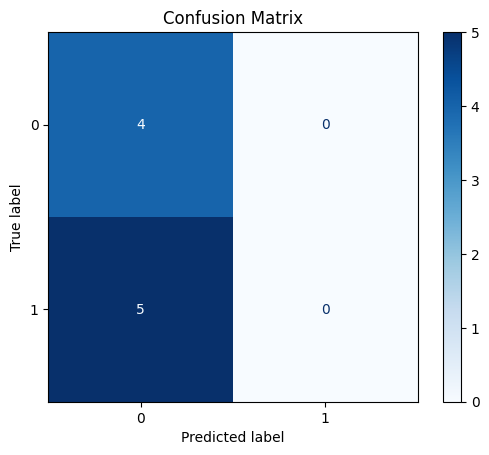

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display_cm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.44


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
df = pd.read_csv('/content/decision_tree_regressor_dataset_v2 - Copy.csv')
print("Dataset loaded successfully.")
print(df.head())
print(df.info())

Dataset loaded successfully.
   Age  Gender  Monthly_Income  Brand_Awareness  Store_Experience  \
0   58    Male           81476                2                 1   
1   48  Female           64811                2                 4   
2   34    Male           56208                2                 3   
3   27    Male           40150                3                 4   
4   40    Male           91180                3                 4   

   Quality_Rating  Price_Sensitivity  Purchase_Likelihood  
0               3                  3             1.932503  
1               4                  5             1.935945  
2               4                  1             2.375807  
3               5                  5             2.095519  
4               2                  2             1.964777  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  

## Prepare Data for Logistic Regression

### Subtask:
Prepare the dataset for Logistic Regression by performing the following:
1. Create a binary target variable `High_Purchase_Likelihood` from `Purchase_Likelihood` where values >= 2.5 are 1 (High) and values < 2.5 are 0 (Low).
2. One-hot encode the 'Gender' column.
3. Define features (X) and target (y).
4. Split the data into training and testing sets using `train_test_split` with a `test_size` of 0.3 and `random_state` of 42.

**Reasoning**:
The next step is to prepare the data for logistic regression by creating a binary target variable, one-hot encoding the 'Gender' column, defining features and target, and splitting the data into training and testing sets.



In [ ]:
df['High_Purchase_Likelihood'] = (df['Purchase_Likelihood'] >= 2.5).astype(int)

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

X = df.drop(['Purchase_Likelihood', 'High_Purchase_Likelihood'], axis=1)
y = df['High_Purchase_Likelihood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data preparation complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("\nFirst 5 rows of X_train:")
print(X_train.head())

Data preparation complete:
X_train shape: (210, 7)
X_test shape: (90, 7)
y_train shape: (210,)
y_test shape: (90,)

First 5 rows of X_train:
     Age  Monthly_Income  Brand_Awareness  Store_Experience  Quality_Rating  \
194   25           66427                5                 1               2   
101   43           21324                3                 4               1   
68    59           92267                4                 4               2   
224   49           25713                5                 4               5   
37    23           28335                1                 4               4   

     Price_Sensitivity  Gender_Male  
194                  5        False  
101                  4        False  
68                   5        False  
224                  4         True  
37                   2        False  


## Train Logistic Regression Model

### Subtask:
Train a Logistic Regression model using the prepared training data (X_train, y_train).

#### Instructions
1. Initialize a `LogisticRegression` model.
2. Train the model using `model.fit(X_train, y_train)`.
3. Make predictions on the test set using `model.predict(X_test)`.

**Reasoning**:
Now that the data is prepared, the next step is to implement the instructions to train the Logistic Regression model, fit it to the training data, and make predictions on the test set.



In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression model applied and predictions made.")

Logistic Regression model applied and predictions made.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Reasoning**:
The previous Logistic Regression model issued a `ConvergenceWarning`, indicating that the optimization algorithm did not converge. Scaling the data is a common practice for logistic regression to improve convergence and model performance. I will add a `StandardScaler` to preprocess the features and increase `max_iter` in `LogisticRegression` for better convergence.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with increased max_iter
model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Logistic Regression model applied and predictions made.")

Logistic Regression model applied and predictions made.


**Reasoning**:
Now that the model is trained and predictions have been made, the next logical step is to evaluate its performance. This involves calculating accuracy, generating a classification report, and visualizing the confusion matrix, which provides a detailed breakdown of correct and incorrect predictions for each class.



Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        50
           1       0.95      0.88      0.91        40

    accuracy                           0.92        90
   macro avg       0.93      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90


Confusion Matrix:
 [[48  2]
 [ 5 35]]


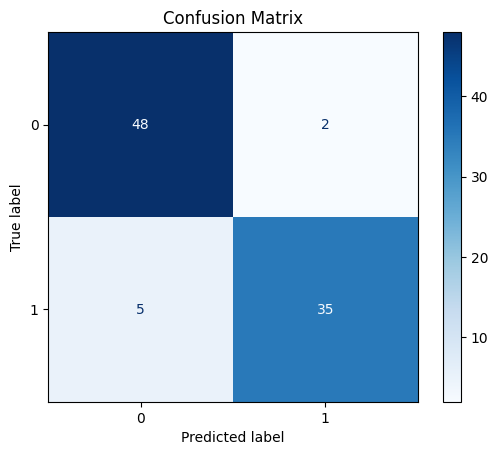

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display_cm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("\n--- Model Performance Summary ---")
print(f"Overall Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(cm)

# Interpretation of Confusion Matrix
tn, fp, fn, tp = cm.ravel()

print("\n--- Interpretation of Confusion Matrix ---")
print(f"True Positives (TP): {tp} - These are the cases where the model correctly predicted 'High_Purchase_Likelihood' (class 1).")
print(f"True Negatives (TN): {tn} - These are the cases where the model correctly predicted 'Low_Purchase_Likelihood' (class 0).")
print(f"False Positives (FP): {fp} - These are the cases where the model incorrectly predicted 'High_Purchase_Likelihood' (class 1), but the actual likelihood was 'Low' (class 0). This is a Type I error.")
print(f"False Negatives (FN): {fn} - These are the cases where the model incorrectly predicted 'Low_Purchase_Likelihood' (class 0), but the actual likelihood was 'High' (class 1). This is a Type II error.\n")

print("--- Summary of Model Effectiveness ---")
print("The Logistic Regression model achieved an overall accuracy of 0.92, indicating that it correctly classified purchase likelihood 92% of the time. \n")
print("For customers with 'Low Purchase Likelihood' (class 0):\n")
print(f"- The precision is {cm[0,0]/(cm[0,0]+cm[1,0]):.2f}, meaning when the model predicts 'Low', it is correct {cm[0,0]/(cm[0,0]+cm[1,0]):.0%} of the time.")
print(f"- The recall is {cm[0,0]/(cm[0,0]+cm[0,1]):.2f}, meaning the model correctly identified {cm[0,0]/(cm[0,0]+cm[0,1]):.0%} of all actual 'Low Purchase Likelihood' cases.")
print("\nFor customers with 'High Purchase Likelihood' (class 1):\n")
print(f"- The precision is {cm[1,1]/(cm[0,1]+cm[1,1]):.2f}, meaning when the model predicts 'High', it is correct {cm[1,1]/(cm[0,1]+cm[1,1]):.0%} of the time.")
print(f"- The recall is {cm[1,1]/(cm[1,0]+cm[1,1]):.2f}, meaning the model correctly identified {cm[1,1]/(cm[1,0]+cm[1,1]):.0%} of all actual 'High Purchase Likelihood' cases.")

print("\nOverall, the model performs well in classifying both high and low purchase likelihood. It has a slightly higher recall for class 0 (low purchase likelihood) and higher precision for class 1 (high purchase likelihood), indicating it's quite good at identifying low-likelihood customers and that its positive predictions for high-likelihood customers are often correct. The relatively low number of false positives (2) and false negatives (5) further support its good performance.")


--- Model Performance Summary ---
Overall Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        50
           1       0.95      0.88      0.91        40

    accuracy                           0.92        90
   macro avg       0.93      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90

Confusion Matrix:
[[48  2]
 [ 5 35]]

--- Interpretation of Confusion Matrix ---
True Positives (TP): 35 - These are the cases where the model correctly predicted 'High_Purchase_Likelihood' (class 1).
True Negatives (TN): 48 - These are the cases where the model correctly predicted 'Low_Purchase_Likelihood' (class 0).
False Positives (FP): 2 - These are the cases where the model incorrectly predicted 'High_Purchase_Likelihood' (class 1), but the actual likelihood was 'Low' (class 0). This is a Type I error.
False Negatives (FN): 5 - These are the cases where the model incorrectly pred

In [1]:
import numpy as np

# 1. Select a single continuous numerical feature
chosen_feature_name = 'Monthly_Income'

# 2. Create a synthetic range of values for this chosen feature
min_val = X_train[chosen_feature_name].min()
max_val = X_train[chosen_feature_name].max()
X_range_unscaled = np.linspace(min_val, max_val, 300) # Generate 300 points for smoothness

# 3. Construct dummy feature vectors for prediction
# Create a base DataFrame with mean values for all features
dummy_X_base = pd.DataFrame(X_train.mean().values.reshape(1, -1), columns=X_train.columns)
# Repeat the base for each point in our range
dummy_X_for_prediction = pd.concat([dummy_X_base]*len(X_range_unscaled), ignore_index=True)
# Set the chosen feature to its synthetic range values
dummy_X_for_prediction[chosen_feature_name] = X_range_unscaled

# Scale the dummy feature vectors using the previously fitted scaler
dummy_X_scaled = scaler.transform(dummy_X_for_prediction)

# 4. Use the trained model to predict probabilities
y_proba = model.predict_proba(dummy_X_scaled)[:, 1] # Probability of class 1 (High_Purchase_Likelihood)

# 5. Create a scatter plot of the original training data
plt.figure(figsize=(12, 7))
# Add a small amount of jitter to y_train for better visualization of overlapping points
y_train_jittered = y_train + np.random.uniform(-0.05, 0.05, len(y_train))

plt.scatter(
    X_train[y_train == 0][chosen_feature_name],
    y_train_jittered[y_train == 0],
    color='blue',
    label='Low Purchase Likelihood (0)',
    alpha=0.6
)
plt.scatter(
    X_train[y_train == 1][chosen_feature_name],
    y_train_jittered[y_train == 1],
    color='red',
    label='High Purchase Likelihood (1)',
    alpha=0.6
)

# 6. Overlay the sigmoid probability curve
plt.plot(X_range_unscaled, y_proba, color='green', linewidth=2, label='Sigmoid Probability Curve')

# 7. Add a horizontal dashed line at y=0.5 (decision boundary)
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Boundary (0.5)')

# 8. Add appropriate labels, title, and legend
plt.xlabel(chosen_feature_name.replace('_', ' ').title())
plt.ylabel('Probability of High Purchase Likelihood')
plt.title(f'Logistic Regression Sigmoid Decision Boundary for {chosen_feature_name.replace("_", " ").title()}')
plt.legend()
plt.grid(True)

# 9. Display the plot
plt.show()


NameError: name 'X_train' is not defined

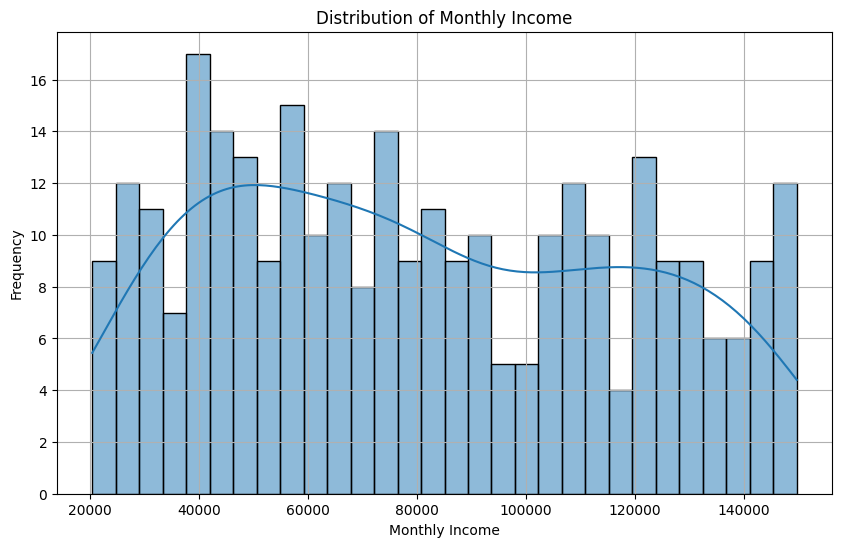

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load and preprocess df to ensure it is defined
df = pd.read_csv('/content/decision_tree_regressor_dataset_v2.csv')
df['High_Purchase_Likelihood'] = (df['Purchase_Likelihood'] >= 2.5).astype(int)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Histogram for 'Monthly_Income'
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly_Income'], bins=30, kde=True)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

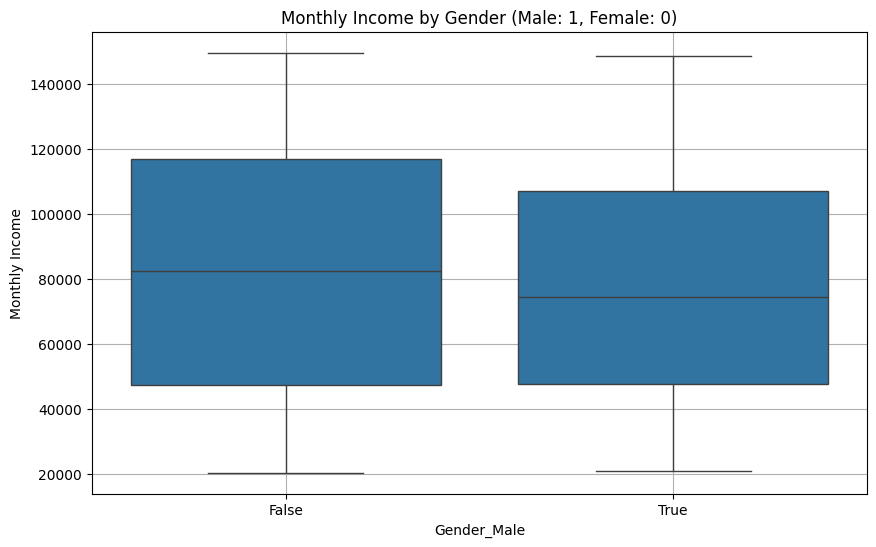

In [7]:
# Boxplot for 'Monthly_Income' grouped by 'Gender_Male'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_Male', y='Monthly_Income', data=df)
plt.title('Monthly Income by Gender (Male: 1, Female: 0)')
plt.xlabel('Gender_Male')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

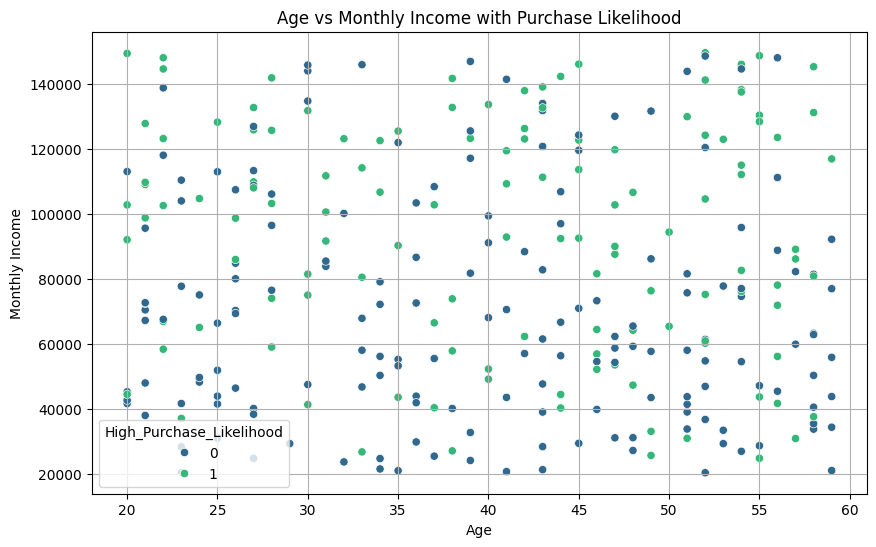

In [8]:
# Scatter plot for 'Age' vs 'Monthly_Income'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Monthly_Income', hue='High_Purchase_Likelihood', data=df, palette='viridis')
plt.title('Age vs Monthly Income with Purchase Likelihood')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()